In [1]:
# Importing the necessary libraries
import numpy as np ## for large arras
import pandas as pd ## for data analysis
import matplotlib.pyplot as plt ## for plot the visuals
import seaborn as sns ## another type of ploating library
import scipy.sparse # scientific computations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import re
from bs4 import BeautifulSoup
from scipy.sparse import coo_matrix

In [2]:
# loading the data in to data frames
df_exhortation = pd.read_csv('./book_dataset/transformed_dataset_copy/exhortation.csv', nrows=499999)
df_exhortation1 = pd.read_csv('./book_dataset/transformed_dataset_copy/tags_clean.csv',nrows=499999)
df_exhortation2 = pd.read_csv('./book_dataset/transformed_dataset_copy/reviewss_clean.csv',nrows=499999)

In [4]:
df_exhortation.head()

,item_id,url,title,authors,lang,img,year_x,description,user_id,rating,year_y,count_books,avg_book_rate
0,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",150222,5,2012,21442,4.401269
1,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",100165,5,2012,21442,4.401269
2,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",232359,4,2012,21442,4.401269
3,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",246427,5,2012,21442,4.401269
4,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",75210,4,2012,21442,4.401269


### Top books rated with best avg rating

In [5]:
print('50% of the books are rated by', np.percentile(df_exhortation['count_books'], 50),'people')

50% of the books are rated by 10215.0 people


--> by considering above scenario 
**On average, 10215 people rate 50% of the books.**

In [6]:
### Top rated boook are following
def highratedBooks():
  highratedBooks = df_exhortation[(df_exhortation['avg_book_rate']>=4.50) & (df_exhortation['count_books']>3000.0)].sort_values(by='avg_book_rate', ascending=False)
  highratedBooks[:100].to_csv('./book_dataset/transformed_dataset_copy/highratedBooks.csv', index=False)
  return highratedBooks[['item_id','title','avg_book_rate','url','img',]].head(5)
highratedBooks()

,item_id,title,avg_book_rate,url,img
472082,25126749,a court of mist and fury a court of thorns and...,4.716058,https://www.goodreads.com/book/show/17927395-a...,https://images.gr-assets.com/books/1485259138m...
467507,25126749,a court of mist and fury a court of thorns and...,4.716058,https://www.goodreads.com/book/show/17927395-a...,https://images.gr-assets.com/books/1485259138m...
467509,25126749,a court of mist and fury a court of thorns and...,4.716058,https://www.goodreads.com/book/show/17927395-a...,https://images.gr-assets.com/books/1485259138m...
467510,25126749,a court of mist and fury a court of thorns and...,4.716058,https://www.goodreads.com/book/show/17927395-a...,https://images.gr-assets.com/books/1485259138m...
467511,25126749,a court of mist and fury a court of thorns and...,4.716058,https://www.goodreads.com/book/show/17927395-a...,https://images.gr-assets.com/books/1485259138m...


### Similar books having same title
1. for finding the similar books by vectorization

In [7]:
tensor_title= TfidfVectorizer()
similar_title_books = tensor_title.fit_transform(df_exhortation["title"])

In [11]:
schema = 'miss peregrines'
continue_1 = re.sub("[^a-zA-Z0-9 ]", "", schema.lower())
schema_tens = tensor_title.transform([schema])
similarity = cosine_similarity(schema_tens, similar_title_books).flatten()
positions = np.argpartition(similarity, -50)[-50:]
outcome = df_exhortation.iloc[positions].head(5)
outcome

,item_id,url,title,authors,lang,img,year_x,description,user_id,rating,year_y,count_books,avg_book_rate
173703,14345371,https://www.goodreads.com/book/show/9460487-mi...,miss peregrines home for peculiar children mis...,Ransom Riggs,en-US,https://images.gr-assets.com/books/1472782916m...,0,A mysterious island. An abandoned orphanage. A...,12677,2,0,10599,3.688744
173702,14345371,https://www.goodreads.com/book/show/9460487-mi...,miss peregrines home for peculiar children mis...,Ransom Riggs,en-US,https://images.gr-assets.com/books/1472782916m...,0,A mysterious island. An abandoned orphanage. A...,229349,5,0,10599,3.688744
173700,14345371,https://www.goodreads.com/book/show/9460487-mi...,miss peregrines home for peculiar children mis...,Ransom Riggs,en-US,https://images.gr-assets.com/books/1472782916m...,0,A mysterious island. An abandoned orphanage. A...,83697,4,0,10599,3.688744
173701,14345371,https://www.goodreads.com/book/show/9460487-mi...,miss peregrines home for peculiar children mis...,Ransom Riggs,en-US,https://images.gr-assets.com/books/1472782916m...,0,A mysterious island. An abandoned orphanage. A...,17301,4,0,10599,3.688744
173699,14345371,https://www.goodreads.com/book/show/9460487-mi...,miss peregrines home for peculiar children mis...,Ransom Riggs,en-US,https://images.gr-assets.com/books/1472782916m...,0,A mysterious island. An abandoned orphanage. A...,12675,5,0,10599,3.688744


### Simillar books having the same other
1. for finding the similar authour books by vectorization

In [13]:
tensor_author = TfidfVectorizer()
familiarAuthor = tensor_author.fit_transform(df_exhortation["authors"])

In [14]:
schema = 'green'
continue_1 = re.sub("[^a-zA-Z0-9 ]", "", schema.lower())
schema_tens = tensor_author.transform([schema])
similarity = cosine_similarity(schema_tens, familiarAuthor).flatten()
positions = np.argpartition(similarity, -50)[-50:]
outcome = df_exhortation.iloc[positions].head(5)
outcome

,item_id,url,title,authors,lang,img,year_x,description,user_id,rating,year_y,count_books,avg_book_rate
19423,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",20674,4,2012,21442,4.401269
19428,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",304848,5,2012,21442,4.401269
19429,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",304849,3,2012,21442,4.401269
19420,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",215391,5,2012,21442,4.401269
19419,16827462,https://www.goodreads.com/book/show/11870085-t...,the fault in our stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel...",304844,5,2012,21442,4.401269


## Content Based Filtering

### *Tf-idfe*

In [15]:
#Tf-idf
tensor_title = TfidfVectorizer(max_df= 659408, min_df= 100,  stop_words='english')
tensor_title.fit(df_exhortation["title"])
tfidf_title = tensor_title.transform(df_exhortation1['tag'])
tfidf_title.shape

(727, 101)

In [16]:
tensor_review = TfidfVectorizer(max_df= 659408, min_df= 500, stop_words='english')
tensor_review.fit(df_exhortation2["txt"].values.astype('U'))
tfidf_review = tensor_review.transform(df_exhortation2['txt'].values.astype('U'))
tfidf_review.shape

(499999, 4259)

In [17]:
#Label Encoding categorical features
labelencoder1 = preprocessing.LabelEncoder()
labelencoder1.fit(df_exhortation['item_id'])
df_exhortation['item_id_mapped'] = labelencoder1.transform(df_exhortation['item_id'])
labelencoder2 = preprocessing.LabelEncoder()
labelencoder2.fit(df_exhortation['authors'])
df_exhortation['authors_mapped'] = labelencoder2.transform(df_exhortation['authors'])
labelencoder3 = preprocessing.LabelEncoder()
labelencoder3.fit(df_exhortation['user_id'])
df_exhortation['user_id_mapped'] = labelencoder3.transform(df_exhortation['user_id'])

In [18]:
df_exhortation.to_csv('./df_book_users.csv', index=False)

In [19]:
tensorsUserBooks = df_exhortation[['item_id_mapped', 'authors_mapped',  'user_id_mapped', 'year_x', 'count_books', 'avg_book_rate',  'rating']]

In [20]:
tensorsUserBooks

,item_id_mapped,authors_mapped,user_id_mapped,year_x,count_books,avg_book_rate,rating
0,39,19,96102,2012,21442,4.401269,5
1,39,19,70918,2012,21442,4.401269,5
2,39,19,132828,2012,21442,4.401269,4
3,39,19,137517,2012,21442,4.401269,5
4,39,19,55298,2012,21442,4.401269,4
...,...,...,...,...,...,...,...
499994,26,38,14901,2010,6638,4.239681,5
499995,26,38,106671,2010,6638,4.239681,5
499996,26,38,97753,2010,6638,4.239681,4
499997,26,38,42178,2010,6638,4.239681,5


In [21]:
input = tensorsUserBooks.drop(columns=['rating'])
output = tensorsUserBooks['rating']
#Normalizing the data
norm = MinMaxScaler()
norm.fit(input)
x_normalized = norm.transform(input)
x_normalized

array([[0.72222222, 0.44186047, 0.57016571, 0.99801587, 1.        ,
        0.83732044],
       [0.72222222, 0.44186047, 0.42075099, 0.99801587, 1.        ,
        0.83732044],
       [0.72222222, 0.44186047, 0.78805821, 0.99801587, 1.        ,
        0.83732044],
       ...,
       [0.48148148, 0.88372093, 0.57996096, 0.99702381, 0.09004856,
        0.75381378],
       [0.48148148, 0.88372093, 0.2502388 , 0.99702381, 0.09004856,
        0.75381378],
       [0.48148148, 0.88372093, 0.87209213, 0.99702381, 0.09004856,
        0.75381378]])

In [22]:
hstack_tensor = hstack((x_normalized, tfidf_review))

In [23]:
hstack_tensor

<499999x4265 sparse matrix of type '<class 'numpy.float64'>'
	with 15219128 stored elements in COOrdinate format>

In [24]:
scipy.sparse.save_npz('./hstack_tensor.npz', hstack_tensor)

In [25]:
hstack_tensor = scipy.sparse.load_npz('./hstack_tensor.npz')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(hstack_tensor, output, test_size=0.30, random_state=42)

In [28]:
#GridSearch on Logistic regression to find best suited parameters for model
logistic_regression = OneVsRestClassifier(LogisticRegression())
parameterMatrix = {'estimator__penalty':['l1','l2'],'estimator__class_weight':[None, 'balanced']}
gs_logistic_regression = GridSearchCV(logistic_regression, parameterMatrix, cv= 2, scoring='f1_macro', verbose=2, return_train_score=True, n_jobs=-1)
gs_logistic_regression.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END estimator__class_weight=None, estimator__penalty=l1; total time=   0.4s
[CV] END estimator__class_weight=None, estimator__penalty=l1; total time=   0.4s
[CV] END estimator__class_weight=balanced, estimator__penalty=l1; total time=   0.4s
[CV] END estimator__class_weight=balanced, estimator__penalty=l1; total time=   0.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END estimator__class_weight=None, estimator__penalty=l2; total time=   8.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END estimator__class_weight=None, estimator__penalty=l2; total time=   9.4s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END estimator__class_weight=balanced, estimator__penalty=l2; total time=   9.9s
[CV] END estimator__class_weight=balanced, estimator__penalty=l2; total time=   9.9s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=2,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__class_weight': [None, 'balanced'],
                         'estimator__penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1_macro', verbose=2)

In [30]:
performanceMatrix = gs_logistic_regression.best_params_
print(performanceMatrix)

{'estimator__class_weight': 'balanced', 'estimator__penalty': 'l2'}


In [32]:
classifier_logistic_regression = OneVsRestClassifier(LogisticRegression())
classifier_logistic_regression.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

OneVsRestClassifier(estimator=LogisticRegression())

In [33]:
input = y_train   
modelprediction = classifier_logistic_regression.predict(X_train.tocsr())
score = precision_score(input, modelprediction, average='macro')
score

0.3800333922677317

In [34]:
input = y_test   
modelprediction = classifier_logistic_regression.predict(X_test.tocsr())
score = precision_score(input, modelprediction, average='macro')
score

0.30683694561523284

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


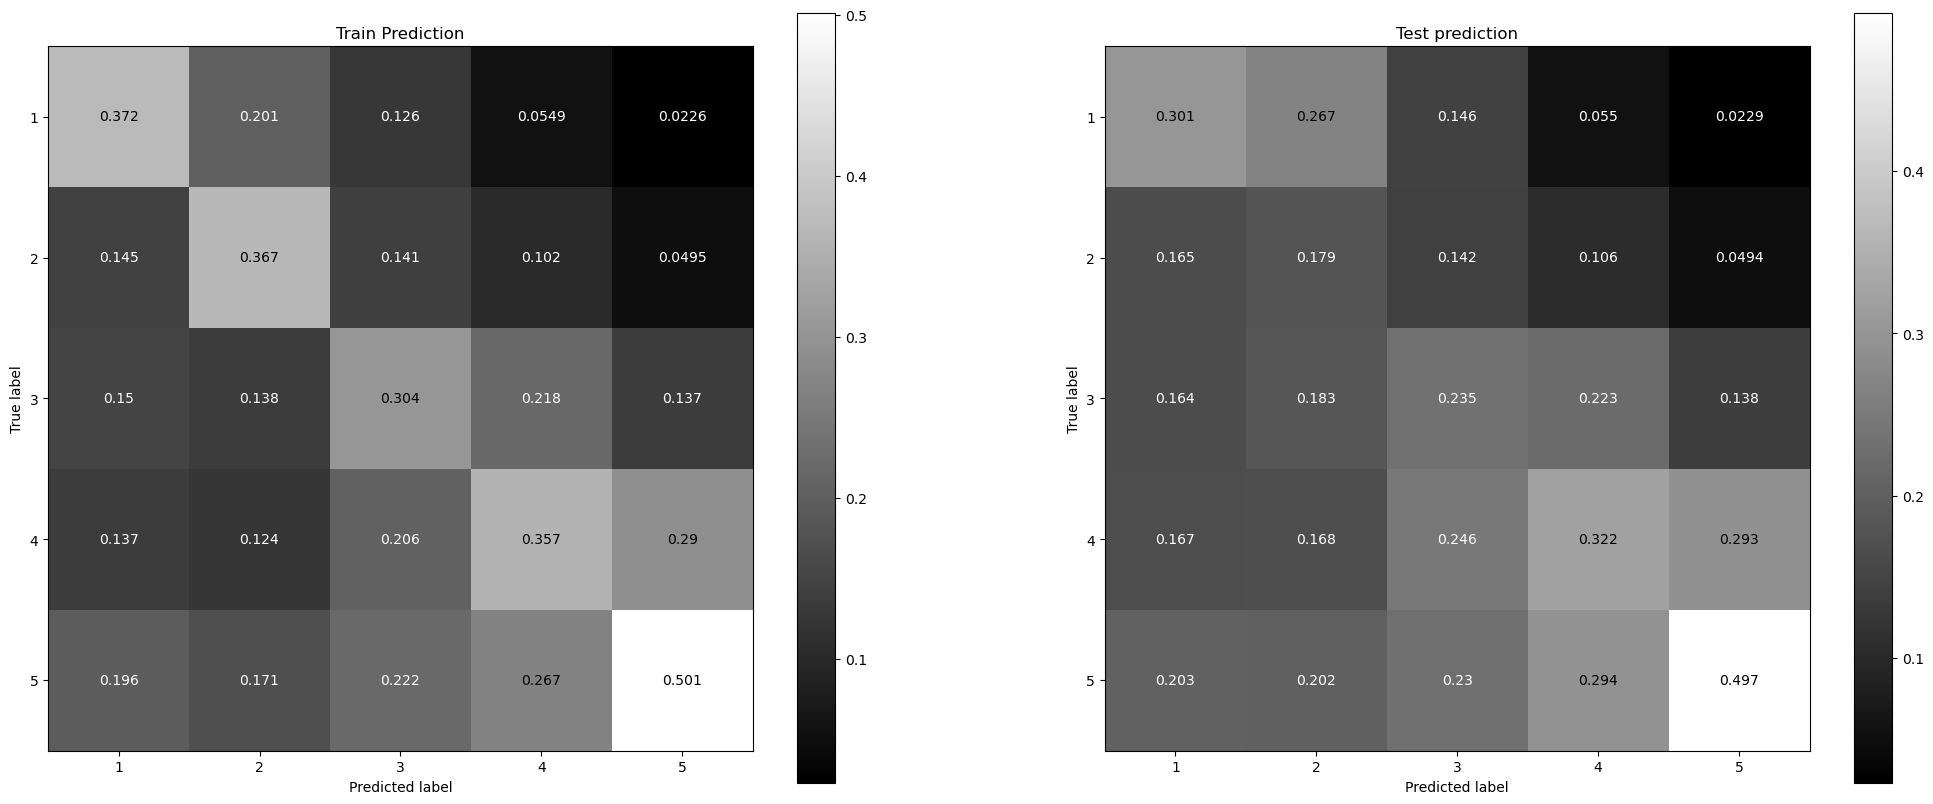

In [37]:
### Confusion Matrix
figure, axes = plt.subplots(1, 2, figsize=(25,10))
plot_confusion_matrix(classifier_logistic_regression, X_train, y_train, values_format='.3g', ax=axes[0], normalize='pred', cmap='gist_gray')  
plot_confusion_matrix(classifier_logistic_regression, X_test, y_test, values_format='.3g', ax=axes[1], normalize='pred', cmap='gist_gray') 
axes[0].set_title('Train Prediction')
axes[1].set_title('Test prediction') 
plt.show()

In [36]:
##GridSearch on DecisionTree to find best suited parameters for model
classifier= DecisionTreeClassifier()
parameters = {'max_depth':[15, 17],'min_samples_split':[20]}
classifier_1 = GridSearchCV(classifier, parameters, cv= 2, scoring='f1_macro', verbose=2, return_train_score=True, n_jobs=-1)
classifier_1.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END .................max_depth=15, min_samples_split=20; total time=  12.7s
[CV] END .................max_depth=15, min_samples_split=20; total time=  13.7s
[CV] END .................max_depth=17, min_samples_split=20; total time=  15.5s
[CV] END .................max_depth=17, min_samples_split=20; total time=  16.3s


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 17], 'min_samples_split': [20]},
             return_train_score=True, scoring='f1_macro', verbose=2)

In [39]:
performanceMatrix = classifier_1.best_params_
print(performanceMatrix)

{'max_depth': 17, 'min_samples_split': 20}


In [40]:
classifierAccurate = DecisionTreeClassifier(max_depth=20, min_samples_split=20)
classifierAccurate.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=20)

In [38]:
## Evaluting the model
input = y_train   # max_depth=20, min_samples_split=20
modelprediction = classifierAccurate.predict(X_train.tocsr())
Model_val = precision_score(input, modelprediction, average='macro')
Model_val

0.49780073542707415

In [41]:
input = y_test   # max_depth=20, min_samples_split=20
modelprediction = classifierAccurate.predict(X_test.tocsr())
Model_val = precision_score(input, modelprediction, average='macro')
Model_val

0.3019157378937092

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


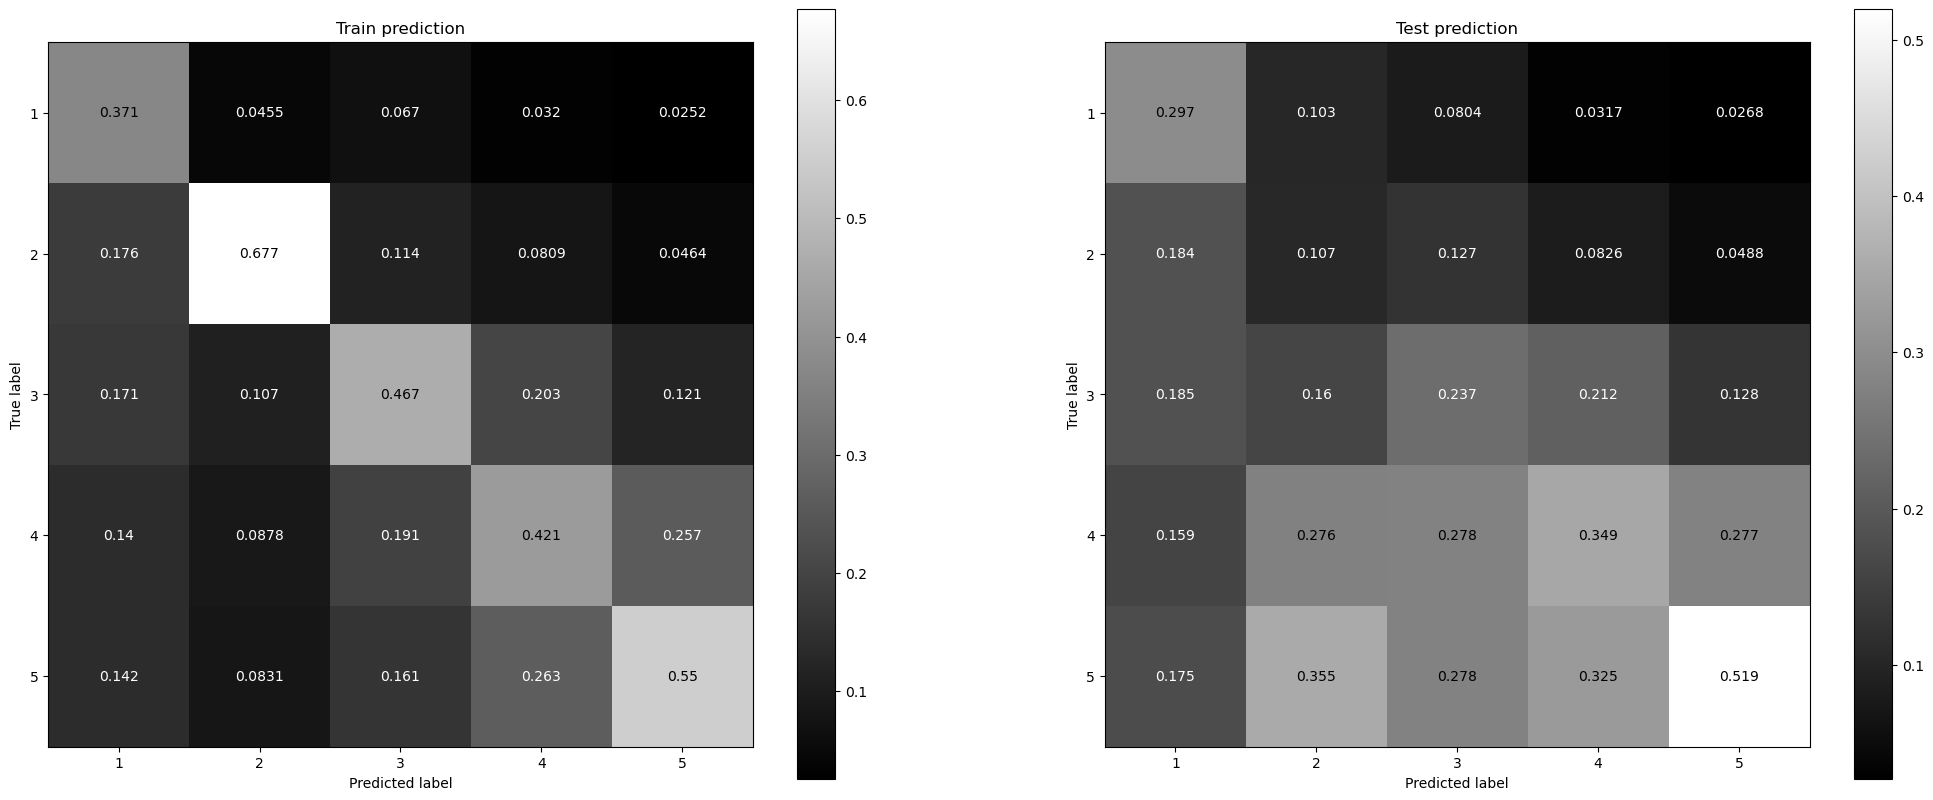

In [42]:
#### Confusion Matrix precision score
figure, axes = plt.subplots(1, 2, figsize=(25,10))
plot_confusion_matrix(classifierAccurate, X_train, y_train, values_format='.3g', ax=axes[0], normalize='pred', cmap='gist_gray')  
plot_confusion_matrix(classifierAccurate, X_test, y_test, values_format='.3g', ax=axes[1], normalize='pred', cmap='gist_gray') 
axes[0].set_title('Train prediction')
axes[1].set_title('Test prediction') 
plt.show()

In [43]:
####*GridSearch on RandomForest to find best suited parameters for model*
classifier = RandomForestClassifier()
modal_val = {'max_depth':[15],'min_samples_split':[20, 25]}
classifier_1 = GridSearchCV(classifier, modal_val, cv= 2, scoring='f1_macro', verbose=2, return_train_score=True, n_jobs=-1)
classifier_1.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END .................max_depth=15, min_samples_split=25; total time=  14.7s
[CV] END .................max_depth=15, min_samples_split=25; total time=  14.7s
[CV] END .................max_depth=15, min_samples_split=20; total time=  14.9s
[CV] END .................max_depth=15, min_samples_split=20; total time=  14.9s


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15], 'min_samples_split': [20, 25]},
             return_train_score=True, scoring='f1_macro', verbose=2)

In [44]:
bestScore = classifier_1.best_score_
modal_val = classifier_1.best_params_
print(modal_val)

{'max_depth': 15, 'min_samples_split': 20}


In [45]:
classifierAccurate_rf = RandomForestClassifier(max_depth=15, min_samples_split=25)
classifierAccurate_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=25)

In [46]:
input = y_train   # max_depth=15, min_samples_split=20
modal_val = classifierAccurate_rf.predict(X_train.tocsr())
modal_val_1 = precision_score(input, modal_val, average='macro')
modal_val_1

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.25969179342476945

In [47]:
input = y_test   # max_depth=15, min_samples_split=20
modal_val = classifierAccurate_rf.predict(X_test.tocsr())
modal_val_1 = precision_score(input, modal_val, average='macro')
modal_val_1

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1567223389005567

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


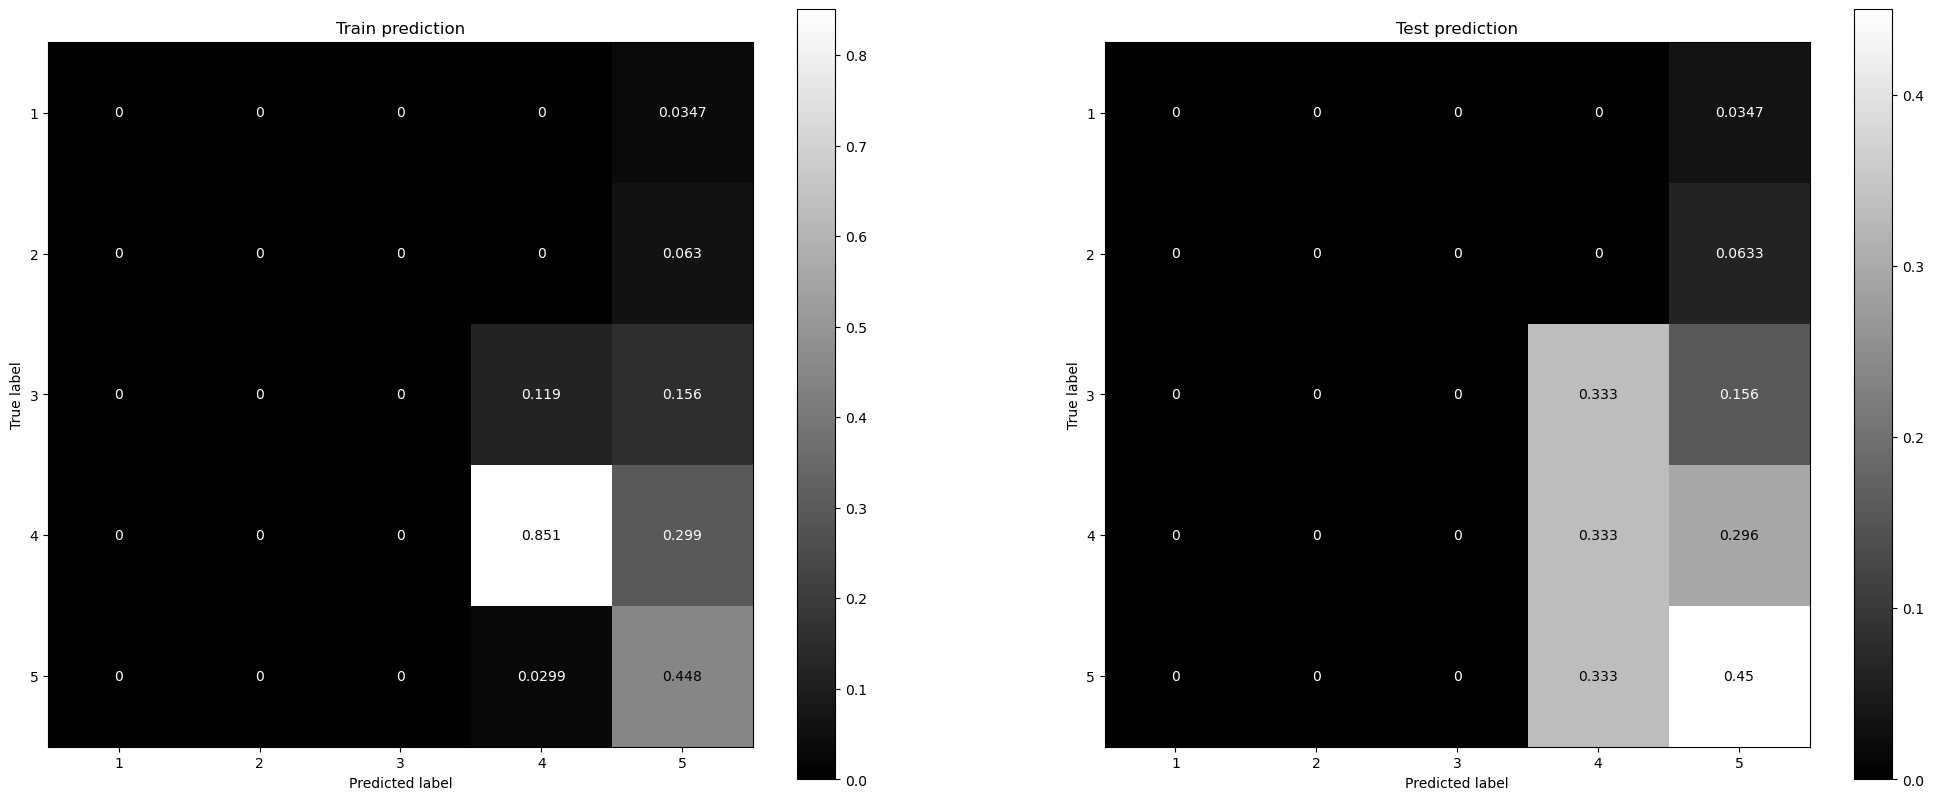

In [48]:
### confusion matrix
figure, axes = plt.subplots(1, 2, figsize=(25,10))
plot_confusion_matrix(classifierAccurate_rf, X_train, y_train, values_format='.3g', ax=axes[0], normalize='pred', cmap='gist_gray')  
plot_confusion_matrix(classifierAccurate_rf, X_test, y_test, values_format='.3g', ax=axes[1], normalize='pred', cmap='gist_gray') 
axes[0].set_title('Train prediction')
axes[1].set_title('Test prediction') 
plt.show()

In [49]:
###Regression Algorithm
Regression = DecisionTreeRegressor()
modal_val = {'max_depth':[15, 20, 30],'min_samples_split':[20, 23, 25]}
Regression_1 = GridSearchCV(Regression, modal_val, cv= 2, scoring='neg_root_mean_squared_error', verbose=2, return_train_score=True, n_jobs=-1)
Regression_1.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .................max_depth=15, min_samples_split=25; total time=  15.9s
[CV] END .................max_depth=15, min_samples_split=20; total time=  16.3s
[CV] END .................max_depth=15, min_samples_split=25; total time=  16.2s
[CV] END .................max_depth=15, min_samples_split=23; total time=  16.8s
[CV] END .................max_depth=15, min_samples_split=23; total time=  15.3s
[CV] END .................max_depth=15, min_samples_split=20; total time=  15.6s
[CV] END .................max_depth=20, min_samples_split=20; total time=  22.9s
[CV] END .................max_depth=20, min_samples_split=20; total time=  23.7s
[CV] END .................max_depth=20, min_samples_split=25; total time=  22.4s
[CV] END .................max_depth=20, min_samples_split=23; total time=  22.9s
[CV] END .................max_depth=20, min_samples_split=23; total time=  23.1s
[CV] END .................max_depth=20, min_sampl

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 30],
                         'min_samples_split': [20, 23, 25]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [52]:
performanceMatrix = Regression_1.best_params_
print(performanceMatrix)

{'max_depth': 15, 'min_samples_split': 23}


In [53]:
PerformanceRegression = DecisionTreeRegressor(max_depth=15, min_samples_split=25)
PerformanceRegression.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_split=25)

In [54]:
input = y_train   # max_depth=15, min_samples_split=25
modal_val = PerformanceRegression.predict(X_train.tocsr())
modal_val_1 = mean_squared_error(input, modal_val)
modal_val_1

0.9806899912407061

In [55]:
input = y_test   # max_depth=15, min_samples_split=25
modal_val = PerformanceRegression.predict(X_test.tocsr())
modal_val_1 = mean_squared_error(input, modal_val)
modal_val_1

1.0607488598230854

## Collaborative Filtering
### User-User Similarity

In [18]:
user_id = '2351'
books_liked_by_user = set(df_exhortation[df_exhortation['user_id']== user_id]['item_id'])
count_other_similar_users = df_exhortation[df_exhortation['item_id'].isin(books_liked_by_user)]['user_id'].value_counts()
df_similar_user = count_other_similar_users.to_frame().reset_index()
df_similar_user.columns = ['user_id', 'matching_book_count']
top_onepercent_similar_users = df_similar_user[df_similar_user['matching_book_count']>=np.percentile(df_similar_user['matching_book_count'], 99)]
top_users = set(top_onepercent_similar_users['user_id'])
df_similar_user = df_exhortation[(df_exhortation['user_id'].isin(top_users))][['user_id_mapped', 'item_id_mapped', 'rating', 'user_id', 'item_id', 'count_books', 'img', 'url', 'avg_book_rate']]
ratings_mat_coo = coo_matrix((df_similar_user["rating"], (df_similar_user["user_id_mapped"], df_similar_user["item_id_mapped"])))
ratings_mat = ratings_mat_coo.tocsr()
my_index = list(labelencoder3.transform([user_id]))[0]
similarity = cosine_similarity(ratings_mat[my_index,:], ratings_mat).flatten()
similar_users_index = np.argsort(similarity)[-1:-51:-1]
df_similar_users_refined = df_similar_user[(df_similar_user["user_id_mapped"].isin(similar_users_index)) & (~df_similar_user['item_id'].isin(books_liked_by_user))].copy()
book_title_liked_by_user = set(df_exhortation[df_exhortation['item_id'].isin(books_liked_by_user)].sort_values(by='rating', ascending=False))
same_books = df_similar_users_refined['item_id'].value_counts()
same_books = same_books.to_frame().reset_index()
same_books.columns = ["item_id", "book_count"]
same_books_item_id = list(same_books['item_id'])
same_books_new = [df_exhortation['item_id'].isin(same_books_item_id)]
same_books_new = same_books_new.merge(same_books, on='item_id', how='inner')
same_books_new['score'] = same_books_new['count_books'] * (same_books_new['book_count']/same_books_new['count_books'])
same_books_new.head(5)

,item_id,url,title,authors,lang,img,year_x,description,user_id,rating,year_y,count_books,avg_book_rate
250809,14245059,https://www.goodreads.com/book/show/9361589-th...,the night circus,Erin Morgenstern,eng,https://images.gr-assets.com/books/1387124618m...,2011,The circus arrives without warning. No announc...,16865,3,2011,9778,4.096748
499152,3060926,https://www.goodreads.com/book/show/1885.Pride...,pride and prejudice,Jane Austen,eng,https://images.gr-assets.com/books/1320399351m...,2000,"""It is a truth universally acknowledged, that ...",63602,5,2000,5673,4.359422
163592,21825181,https://www.goodreads.com/book/show/18007564-t...,the martian,Andy Weir,eng,https://images.gr-assets.com/books/1413706054m...,2014,"Six days ago, astronaut Mark Watney became one...",17816,5,2014,11180,4.326118
37451,2792775,https://www.goodreads.com/book/show/2767052-th...,the hunger games the hunger games 1,Suzanne Collins,eng,https://images.gr-assets.com/books/1447303603m...,2008,Winning will make you famous.\nLosing means ce...,175439,5,2008,19818,4.414875
347922,15413183,https://www.goodreads.com/book/show/10507293-t...,the selection the selection 1,Kiera Cass,en-US,https://images.gr-assets.com/books/1322103400m...,2012,"For thirty-five girls, the Selection is the ch...",36818,3,2012,7294,3.874829


### Item-Item Similarity

In [19]:
item_id = 16827462
users_who_liked_book = set(df_exhortation[df_exhortation['item_id']== item_id]['user_id'])
books_id_remaining = df_exhortation[(df_exhortation['user_id'].isin(list(users_who_liked_book)))]
ratings_mat_coo = coo_matrix((books_id_remaining["rating"], (books_id_remaining["item_id_mapped"], books_id_remaining["user_id_mapped"])))
ratings_mat = ratings_mat_coo.tocsr()
my_index = list(labelencoder1.transform([item_id]))[0]
similarity = cosine_similarity(ratings_mat[my_index,:], ratings_mat).flatten()
similar_books_index = np.argsort(similarity)[-1:-51:-1]
score = list(enumerate(similar_books_index))
df_score = pd.DataFrame(score, columns =['score', 'item_id_mapped'])
df_similar_books_to_recommend = (df_exhortation[(df_exhortation['item_id_mapped'].isin(list(similar_books_index)))].merge(df_score, on='item_id_mapped'))[['item_id', 'score']]
unique_df_similar_books_to_recommend = df_similar_books_to_recommend.drop_duplicates(keep='first')
final_books = (df_exhortation[df_exhortation['item_id'].isin(set(unique_df_similar_books_to_recommend['item_id'].values))].merge(unique_df_similar_books_to_recommend, on='item_id')).sort_values(by='score')
final_books.head(5)

,item_id,url,title,authors,lang,img,year_x,description,user_id,rating,year_y,count_books,avg_book_rate
345384,15413183,https://www.goodreads.com/book/show/10507293-t...,the selection the selection 1,Kiera Cass,en-US,https://images.gr-assets.com/books/1322103400m...,2012,"For thirty-five girls, the Selection is the ch...",1744,3,2012,7294,3.874829
234692,2267189,https://www.goodreads.com/book/show/256683.Cit...,city of bones the mortal instruments 1,Cassandra Clare,eng,https://images.gr-assets.com/books/1432730315m...,2007,When fifteen-year-old Clary Fray heads out to ...,25244,1,2007,9613,3.820764
185750,17763198,https://www.goodreads.com/book/show/15507958-m...,me before you me before you 1,Jojo Moyes,eng,https://images.gr-assets.com/books/1357108762m...,2012,Louisa Clark is an ordinary young woman living...,139326,5,2012,11937,4.361732
189033,13306276,https://www.goodreads.com/book/show/8442457-go...,gone girl,Gillian Flynn,eng,https://images.gr-assets.com/books/1339602131m...,2012,"On a warm summer morning in North Carthage, Mi...",24335,5,2012,17536,3.847115
153812,15545385,https://www.goodreads.com/book/show/11235712-c...,cinder the lunar chronicles 1,Marissa Meyer,eng,https://images.gr-assets.com/books/1470056948m...,2012,Sixteen-year-old Cinder is considered a techno...,299865,4,2012,10479,4.188663
